In [9]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,set_link_color_palette

In [2]:
# Take PDBs from the folder "pdb_structures"
pdbs = os.listdir("./pdb_structures")

In [3]:
# Create all pairwise structural alignments using TMAlign
for i in range(len(pdbs)):
    for j in range(i + 1, len(pdbs)):
        os.system(f"C:/Users/canep/Anaconda3/Library/bin/TMalign ./pdb_structures/{pdbs[i]} ./pdb_structures/{pdbs[j]} -a > results/{pdbs[i][:-4]}_{pdbs[j][:-4]}.out")

In [4]:
# Retrieve the TM-score from "results" folder 
alignments = os.listdir("./results")

# Get rid of hidden files (.DS_Store)
alignments = [a for a in alignments if not a.startswith(".")]

# Remove extension from pdb names
trimmed_pdbs = [pdb[:-4] for pdb in pdbs]

# Initialize the distance matrix
distance_matrix = pd.DataFrame(index = trimmed_pdbs, columns = trimmed_pdbs)

# Elements on the main diagonal are all 1s 
for trimmed_pdb in trimmed_pdbs:
    distance_matrix.loc[trimmed_pdb, trimmed_pdb] = 1

# Calculate the remaining elements of the matrix
for alignment in alignments:
    textfile = open('./results/' + alignment, 'r')
    filetext = textfile.read()
    textfile.close()
    
    # Take the score normalized by the average length of chains
    normalized_tm_score = float(re.findall("TM-score= \d+\.\d+", filetext)[2].split("= ")[1])    
    pdb1, pdb2 = alignment[:-4].split("_")
    
    distance_matrix.loc[pdb1, pdb2] = normalized_tm_score
    distance_matrix.loc[pdb2, pdb1] = normalized_tm_score

In [5]:
distance_matrix

,1b8q,1be9,1bfe,1d5g,1g9o,1gm1,1gq4,1gq5,1i92,1ihj,...,2exg,2f0a,2f5y,2fcf,2fe5,2fne,2h3l,2i0i,2pdz,3pdz
1b8q,1,0.57489,0.57834,0.57877,0.55837,0.58652,0.55453,0.56445,0.56323,0.57817,...,0.53433,0.54992,0.57554,0.57937,0.58372,0.58498,0.57289,0.6052,0.55919,0.5018
1be9,0.57489,1,0.94933,0.70021,0.73778,0.75,0.69523,0.69898,0.69517,0.7188,...,0.62233,0.68155,0.73937,0.75284,0.74821,0.76702,0.70225,0.78105,0.73794,0.70127
1bfe,0.57834,0.94933,1,0.7022,0.77533,0.75682,0.72981,0.73387,0.73046,0.75241,...,0.63787,0.68717,0.77483,0.77903,0.77175,0.78472,0.71864,0.80812,0.75349,0.70415
1d5g,0.57877,0.70021,0.7022,1,0.72853,0.77494,0.67519,0.68675,0.69095,0.73225,...,0.6335,0.69669,0.74161,0.73606,0.76075,0.77092,0.71098,0.7444,0.73563,0.7437
1g9o,0.55837,0.73778,0.77533,0.72853,1,0.79505,0.85321,0.85172,0.8412,0.81048,...,0.66785,0.70837,0.871,0.81291,0.82996,0.7999,0.79181,0.82682,0.78967,0.7152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2fne,0.58498,0.76702,0.78472,0.77092,0.7999,0.82458,0.77244,0.77938,0.77705,0.79324,...,0.66463,0.74025,0.8405,0.83163,0.85578,1,0.81621,0.86082,0.8034,0.74416
2h3l,0.57289,0.70225,0.71864,0.71098,0.79181,0.78448,0.73676,0.74348,0.73535,0.75959,...,0.62936,0.68119,0.7999,0.7572,0.80777,0.81621,1,0.76987,0.73108,0.67325
2i0i,0.6052,0.78105,0.80812,0.7444,0.82682,0.8096,0.81309,0.8109,0.80731,0.80846,...,0.63229,0.75938,0.84717,0.85611,0.84745,0.86082,0.76987,1,0.80574,0.71437
2pdz,0.55919,0.73794,0.75349,0.73563,0.78967,0.79154,0.74285,0.75169,0.7434,0.76872,...,0.69035,0.74222,0.80947,0.80245,0.8105,0.8034,0.73108,0.80574,1,0.76418


In [6]:
#Calculate the distance between clusters with different methods

# Method 1: Nearest Point Algorithm
Z1 = linkage(distance_matrix)

# Method 2: UPGMA
Z2 = linkage(distance_matrix, method="average")

# Method 3: WPGMA
Z3 = linkage(distance_matrix, method="weighted")

# z is the hierarchical clustering encoded as a linkage matrix

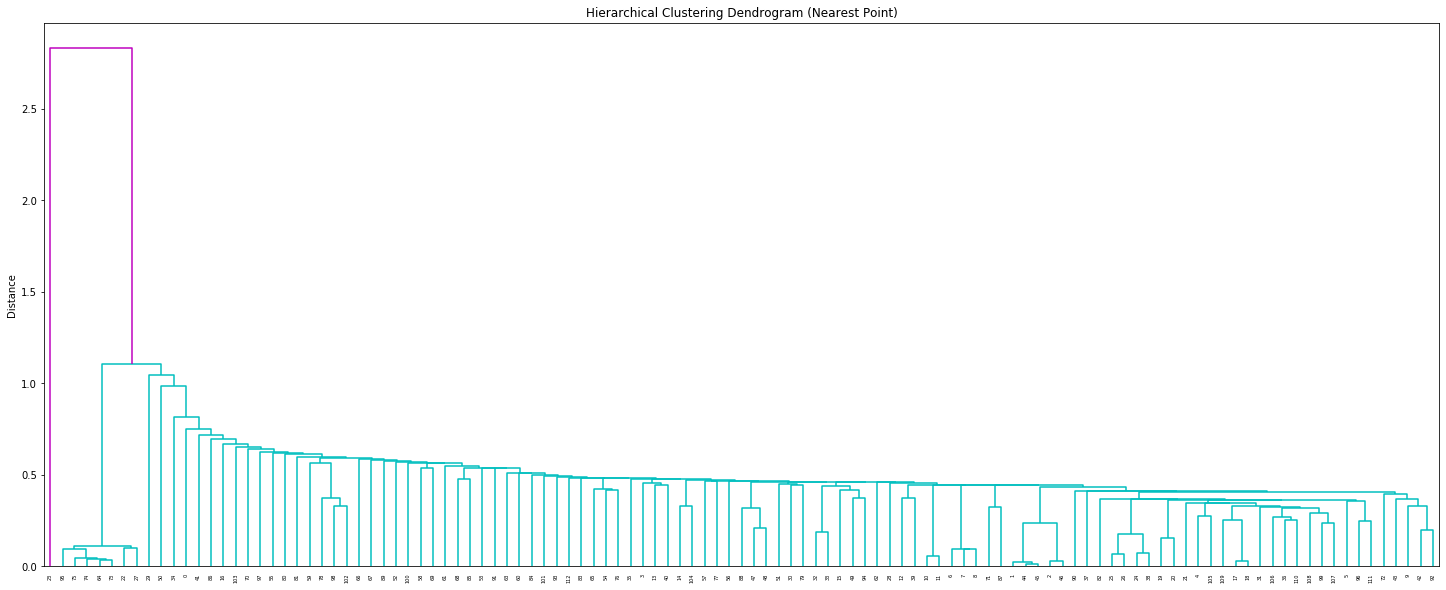

In [20]:
# Plot the dendrogram of hierarchical clustering

plt.figure(figsize=(25, 10))
set_link_color_palette(['c', 'm', 'y', 'k'])
plt.title('Hierarchical Clustering Dendrogram (Nearest Point)')
plt.ylabel('Distance')
dendrogram(Z1,above_threshold_color='m')
plt.savefig('NearestPoint.jpg')
plt.show()

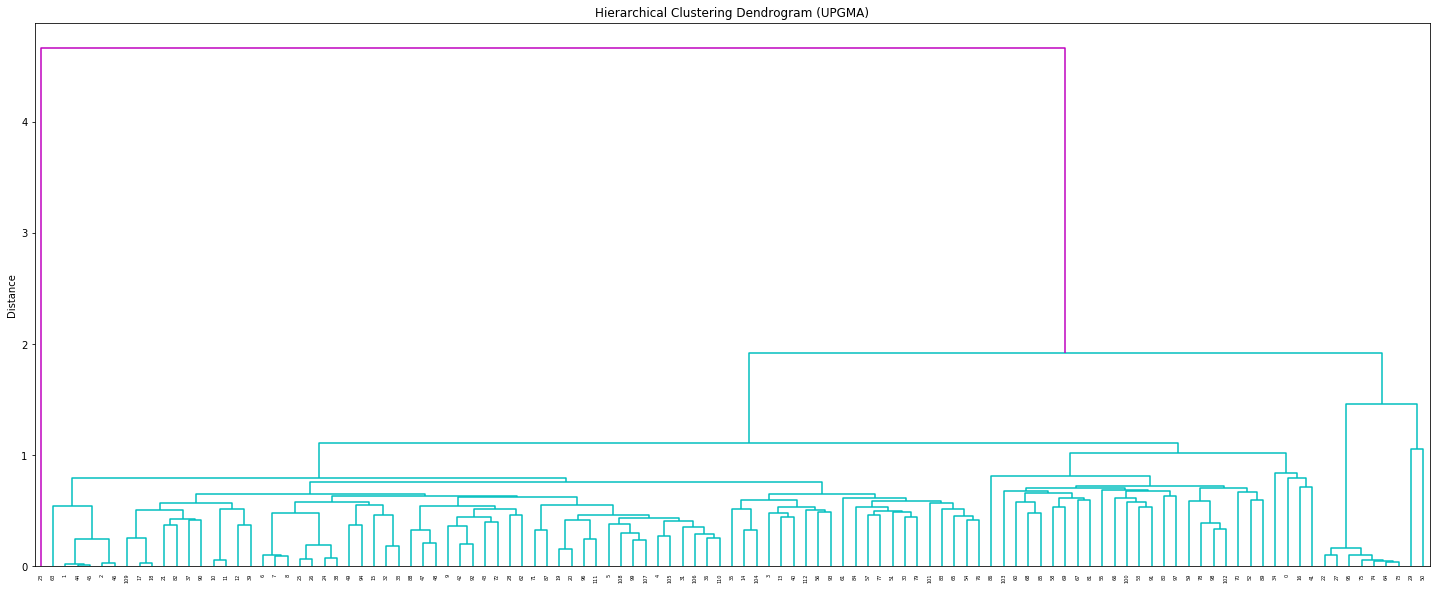

In [21]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (UPGMA)')
plt.ylabel('Distance')
dendrogram(Z2, above_threshold_color='m')
plt.savefig('UPGMA.jpg')
plt.show()

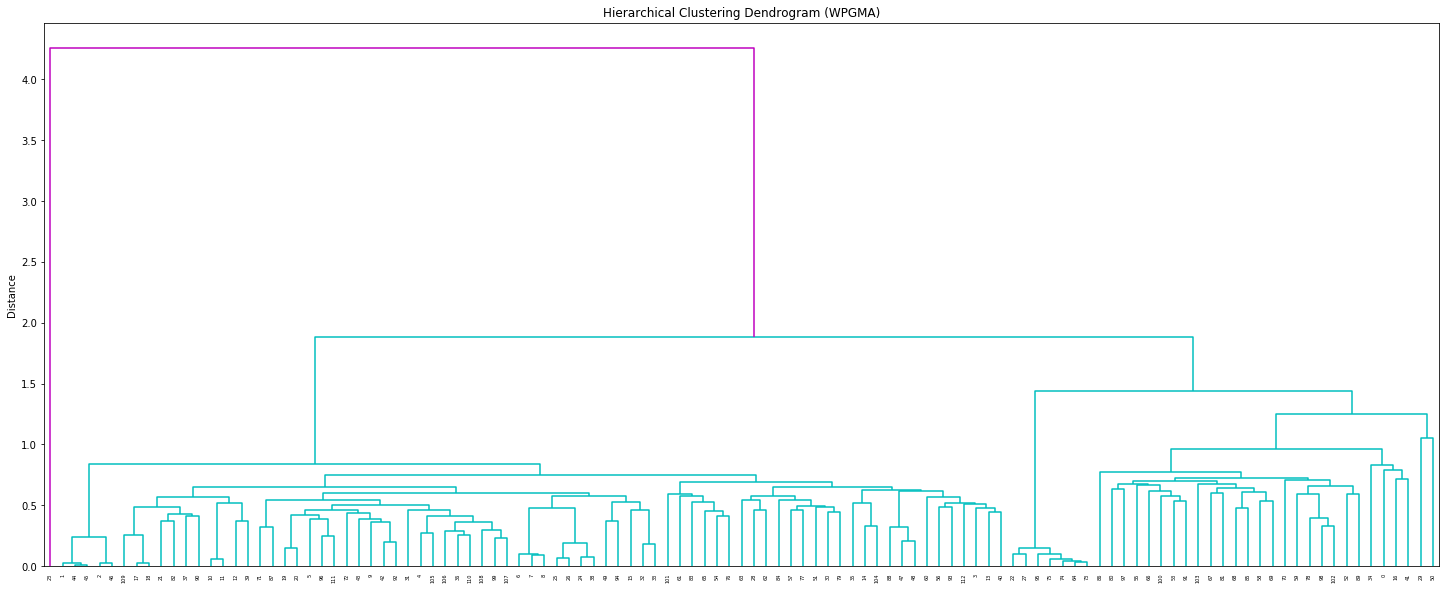

In [22]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (WPGMA)')
plt.ylabel('Distance')
dendrogram(Z3, above_threshold_color='m')
plt.savefig('WPGMA.jpg')
plt.show()